In [269]:
import pyforest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [270]:
df = pd.read_csv('binary.csv')

In [271]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [272]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


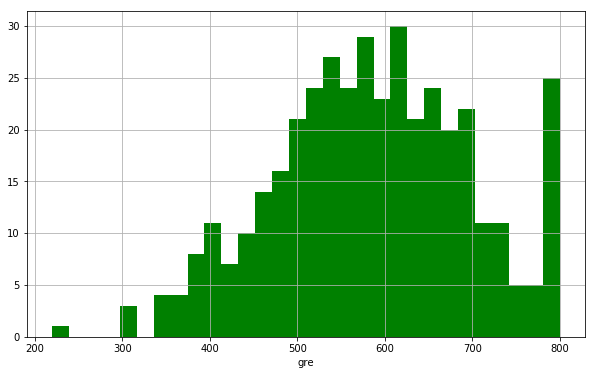

In [273]:
plt.figure(figsize=(10,6))
plt.hist(df['gre'], bins=30, color='g') #bins: max height of y-axis
plt.xlabel('gre')
plt.grid(True)
plt.show()

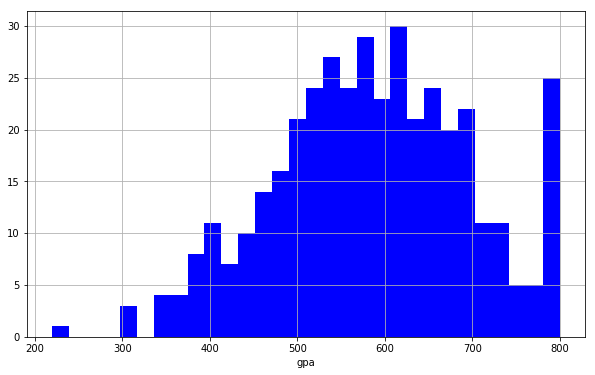

In [274]:
plt.figure(figsize=(10,6))
plt.hist(df['gre'], bins=30, color='b') #bins: max height of y-axis
plt.xlabel('gpa')
plt.grid(True)
plt.show()

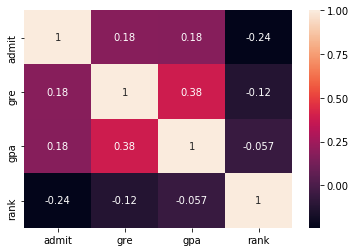

In [307]:
sns.heatmap(df.corr(), annot=True)

In [431]:
features = df[['gre','gpa','rank']]
label = df[['admit']]

In [436]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.1)

In [437]:
#features_train.shape

In [438]:
#features_test.shape

In [439]:
model = LogisticRegression()

In [440]:
model.fit(features_train,label_train)

C:\Users\mtcko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mtcko\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [441]:
label_train.iloc[5]

admit    0
Name: 398, dtype: int64

In [442]:
model.predict([features_train.loc[5]])

array([0], dtype=int64)

In [443]:
from sklearn.metrics import classification_report

In [444]:
print(classification_report(label_test, model.predict(features_test)))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        29
           1       1.00      0.36      0.53        11

   micro avg       0.82      0.82      0.82        40
   macro avg       0.90      0.68      0.71        40
weighted avg       0.86      0.82      0.79        40



In [445]:
from joblib import dump, load

In [456]:
dump(model, 'model1.joblib')

['model1.joblib']

In [471]:
test_predict = pd.DataFrame({
    'gre' : 80,
    'gpa' : 1.0,
    'rank' : 4
}, index=[0])

In [472]:
model.predict(test_predict)

array([0], dtype=int64)